In [3]:
import json
import pandas as pd
from pathlib import Path
from typing import List
from dataclasses import dataclass
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 17

results_dir = Path.cwd().parent / "results" / "reconstruction-experiment"

vae_hf0_hc_results_dir = results_dir / 'exp-reconstruction_model-vae_data-synthetic_hf0_bs-16_lr-0.001_lat-12_seq-96_pred-0_emb-96_codes-2048_spec-no_hc-1'
vae_hf0_lc_results_dir = results_dir / 'exp-reconstruction_model-vae_data-synthetic_hf0_bs-16_lr-0.001_lat-24_seq-96_pred-0_emb-96_codes-2048_spec-no_hc-0'
vae_hf1_hc_results_dir = results_dir / 'exp-reconstruction_model-vae_data-synthetic_hf1_bs-16_lr-0.001_lat-12_seq-96_pred-0_emb-96_codes-2048_spec-no_hc-1'
vae_hf1_lc_results_dir = results_dir / 'exp-reconstruction_model-vae_data-synthetic_hf1_bs-16_lr-0.001_lat-24_seq-96_pred-0_emb-96_codes-2048_spec-no_hc-0'
vqvae_hf0_hc_results_dir = results_dir / 'exp-reconstruction_model-vqvae_data-synthetic_hf0_bs-16_lr-0.001_lat-24_seq-96_pred-0_emb-96_codes-2048_spec-no_hc-1'
vqvae_hf0_lc_results_dir = results_dir / 'exp-reconstruction_model-vqvae_data-synthetic_hf0_bs-16_lr-0.001_lat-24_seq-96_pred-0_emb-96_codes-2048_spec-no_hc-0'
vqvae_hf1_hc_results_dir = results_dir / 'exp-reconstruction_model-vqvae_data-synthetic_hf1_bs-16_lr-0.001_lat-24_seq-96_pred-0_emb-96_codes-2048_spec-no_hc-1'
vqvae_hf1_lc_results_dir = results_dir / 'exp-reconstruction_model-vqvae_data-synthetic_hf1_bs-16_lr-0.001_lat-24_seq-96_pred-0_emb-96_codes-2048_spec-no_hc-0'

In [4]:
@dataclass
class Result:
    model_identifier: str
    results_dir: Path

def create_test_df(results: List[Result]):

    out_dict = {}
    for result in results:
        with open(result.results_dir / "test_metrics.json", "r") as f:
            metrics = json.load(f)
            out_dict[result.model_identifier] = metrics

    df = pd.DataFrame(out_dict).T
    df.index.name = "model_identifier"
    return df

df = create_test_df((
    Result(model_identifier="VAE LF HC", results_dir=Path(vae_hf0_hc_results_dir)),
    Result(model_identifier="VAE LF LC", results_dir=Path(vae_hf0_lc_results_dir)),
    Result(model_identifier="VAE HF HC", results_dir=Path(vae_hf1_hc_results_dir)),
    Result(model_identifier="VAE HF LC", results_dir=Path(vae_hf1_lc_results_dir)),
    Result(model_identifier="VQVAE LF HC", results_dir=Path(vqvae_hf0_hc_results_dir)),
    Result(model_identifier="VQVAE LF LC", results_dir=Path(vqvae_hf0_lc_results_dir)),
    Result(model_identifier="VQVAE HF HC", results_dir=Path(vqvae_hf1_hc_results_dir)),
    Result(model_identifier="VQVAE HF LC", results_dir=Path(vqvae_hf1_lc_results_dir)),
))

df


,test_loss,test_mse,test_denoised_mse,test_denoised_error_fraction,model,best_val_mse,n_epochs_trained,early_stopped
model_identifier,,,,,,,,
VAE LF HC,0.367559,0.078316,0.041016,0.347229,vae,0.076807,5,False
VAE LF LC,0.349802,0.078423,0.040704,0.339197,vae,0.078202,5,False
VAE HF HC,0.78968,0.17613,0.138176,0.440098,vae,0.173534,5,False
VAE HF LC,0.789142,0.16973,0.131449,0.435943,vae,0.168018,5,False
VQVAE LF HC,0.064082,0.031354,0.036558,0.538774,vqvae,0.031096,5,False
VQVAE LF LC,0.022094,0.011011,0.038476,0.777469,vqvae,0.011106,5,False
VQVAE HF HC,0.10481,0.049391,0.044932,0.476327,vqvae,0.04951,5,False
VQVAE HF LC,0.035446,0.016559,0.040591,0.709991,vqvae,0.016608,5,False


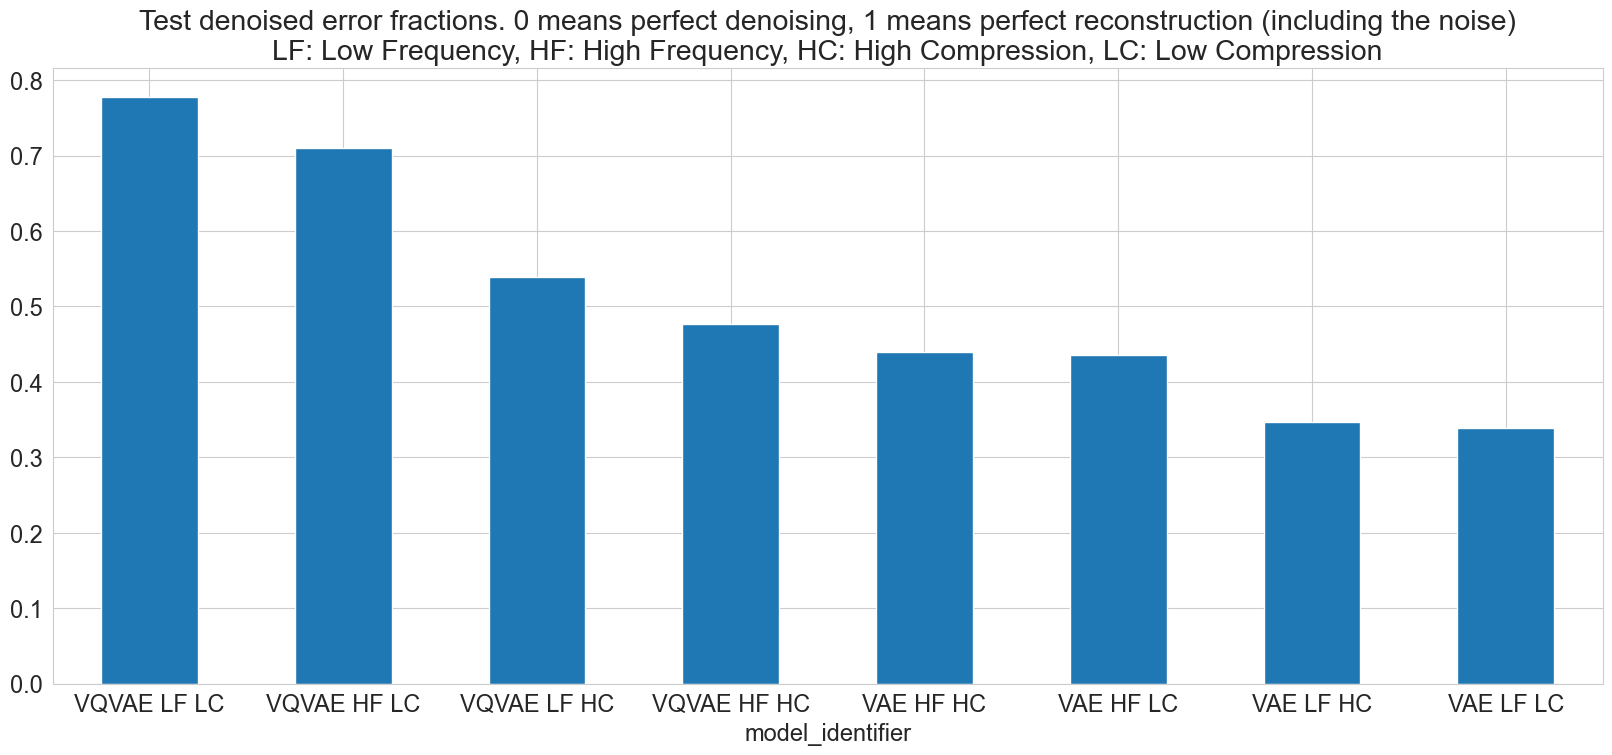

In [5]:
df["test_denoised_error_fraction"].sort_values(ascending=False).plot(
    kind="bar", 
    rot=0,
    title="Test denoised error fractions. 0 means perfect denoising, 1 means perfect reconstruction (including the noise)\nLF: Low Frequency, HF: High Frequency, HC: High Compression, LC: Low Compression"
);

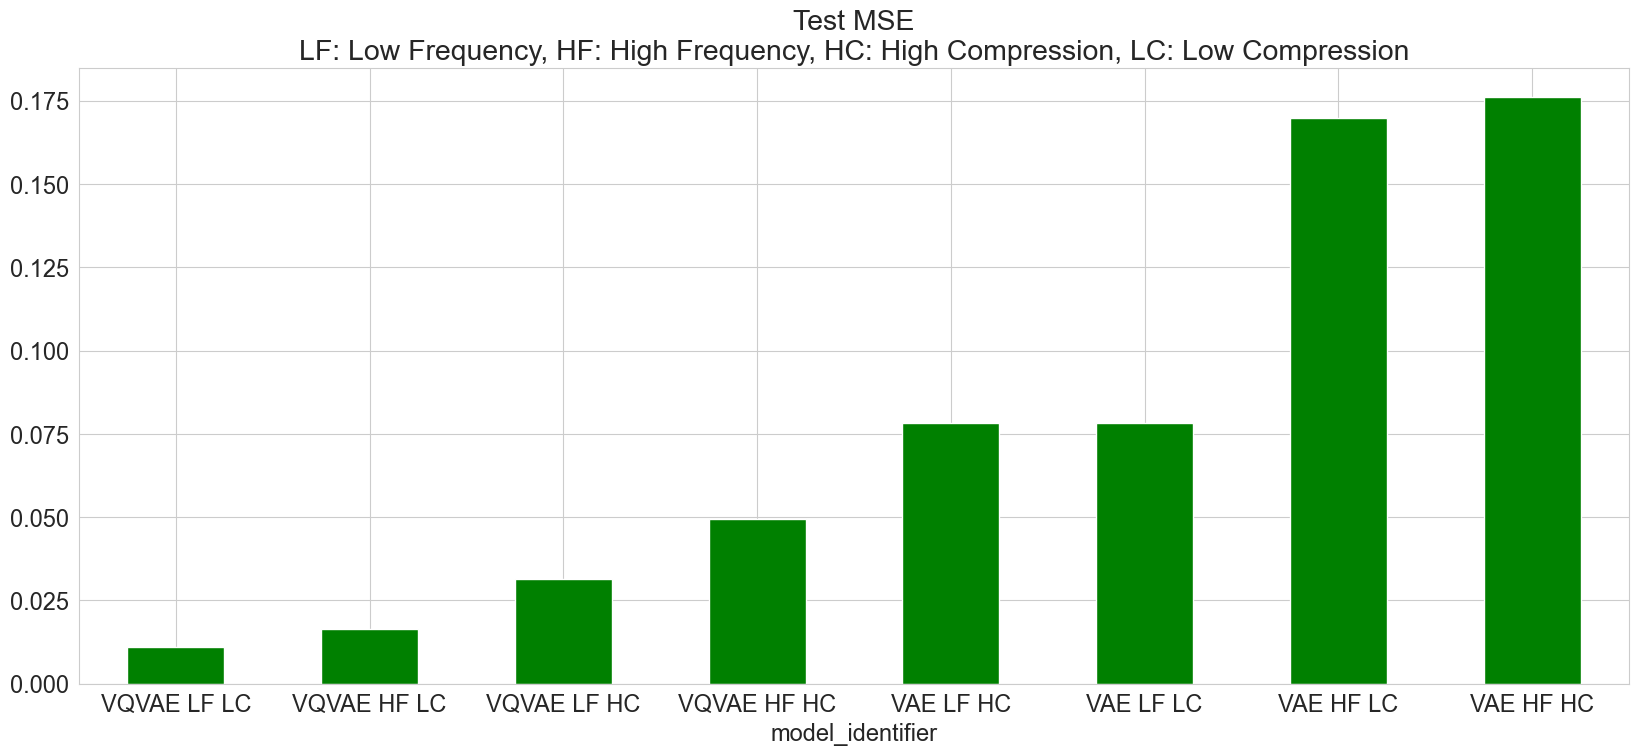

In [6]:
df["test_mse"].sort_values(ascending=True).plot(
    kind="bar", 
    rot=0, 
    color="green",
    title="Test MSE\nLF: Low Frequency, HF: High Frequency, HC: High Compression, LC: Low Compression"
    );

Lower MSE -> More reconstructed noise. Note however that the VQVAE is worse at reconstructing pure noise than high-frequency patterns (suggesting noise and high freq detail are different in a way we might exploit in a model design)